# CSCA 5632 Week 4 Assignment

# Part 1:
Completing Assignment instructions on the BBC News Classification Kaggle Competition.

## Setup Imports

In [ ]:
## Import required packages
import pandas as pd
from collections import Counter
import locale
from matplotlib import pyplot as plt
import seaborn
import numpy as np
import itertools
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, recall_score, precision_score
from sklearn.decomposition import NMF
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
import warnings
warnings.filterwarnings('ignore') # To clean up cell output

## Step 1: Exploratory Data Analysis

### Load and Examine Data
Source: https://www.kaggle.com/c/learn-ai-bbc/data?select=BBC+News+Train.csv
Load and examine the news dataframes.

In [ ]:
## Load and display the train news data

filepath = "CSCA_5632_week4_data/BBC News Train.csv" # Filepath may need altering based on data location
data_train = pd.read_csv(filepath, engine = "python")
print("Number of observations:", len(data_train))
data_train.head()

Number of observations: 1490


,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [ ]:
# count missing values in data_train
data_train.isnull().sum()

,0
ArticleId,0
Text,0
Category,0


In [ ]:
# count none type values in data_train
data_train.isna().sum()

,0
ArticleId,0
Text,0
Category,0


In [ ]:
## Load and display the test news data

filepath = "CSCA_5632_week4_data/BBC News Test.csv" # Filepath may need altering based on data location
data_test = pd.read_csv(filepath, engine = "python")
print("Number of observations:", len(data_test))
data_test.head()

Number of observations: 735


,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...


In [ ]:
# count missing values in data_test
data_test.isnull().sum()

,0
ArticleId,0
Text,0


In [ ]:
# count none type values in data_test
data_test.isna().sum()

,0
ArticleId,0
Text,0


Since the train and test data have no missing or null values, nothing needs to be cleaned in terms of dropping rows.

### Examine the Data

#### Train Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB
None 

Counter({'sport': 346, 'business': 336, 'politics': 274, 'entertainment': 273, 'tech': 261})


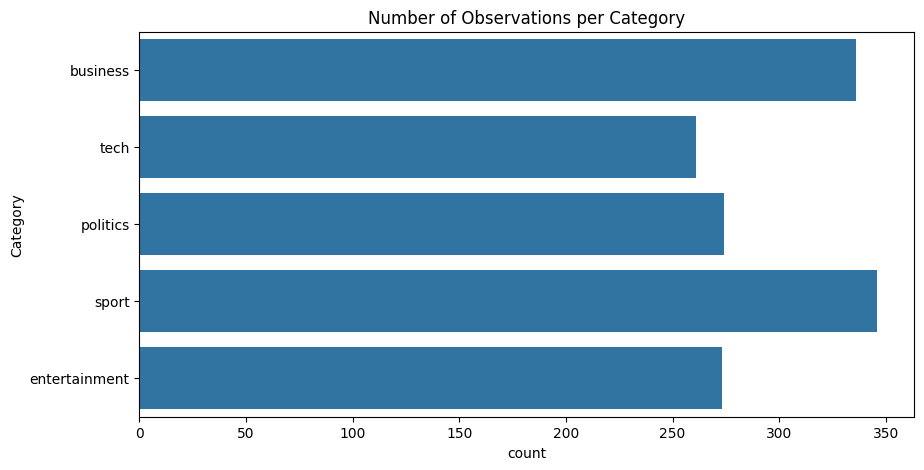

In [ ]:
print(data_train.info(), '\n')
print(Counter(data_train.Category))
plt.figure(figsize = (10, 5))
plt.title("Number of Observations per Category")
seaborn.countplot(data_train.Category)
plt.show()

#### Test Data

In [ ]:
print(data_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  735 non-null    int64 
 1   Text       735 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.6+ KB
None


### Feature Engineering
For this project I will be using TF-IDF (term frequency-inverse document frequency). This is my go to choice for natural language processing projects at my work as it quickly and efficiently converts text into term frequencies based on the inverse of their document frequencies. As a feature it does a great job for supervised problems and will be explored for this unsupervised task. As a summary of what TF-IDF is (description sourced from https://en.wikipedia.org/wiki/Tf%E2%80%93idf):

Essentially, each word's importance in a document relative to a corpus of documents is used as the numeric feature. First, you take the frequency of the word in the document and weight it against the frequency of the given word in all the documents in corpus (in our case train dataset, the same fitting method on the train data is used on the test data for conversion into usable numeric features for predicition / unsupervised learning approaches).

*   Term frequency: The relative frequency of a term t within a document d.

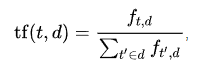

*   Inverse document frequency: The measure of how much information the word provides in terms of its frequency across all documents. It is the logarithmically scaled inverse fraction of the documents that contain the word. N is the total number of documents.

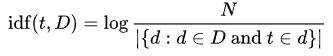

Where they are combined as indicated by this picture from https://kinder-chen.medium.com/introduction-to-natural-language-processing-tf-idf-1507e907c19:

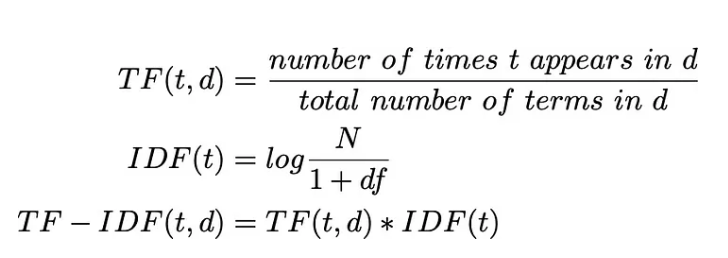

We will now visualize the most common words using standard word frequency across the entire corpus as well as using tf-idf.

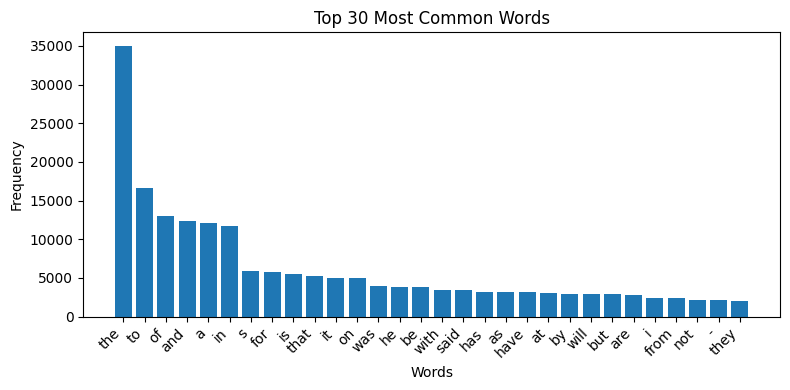

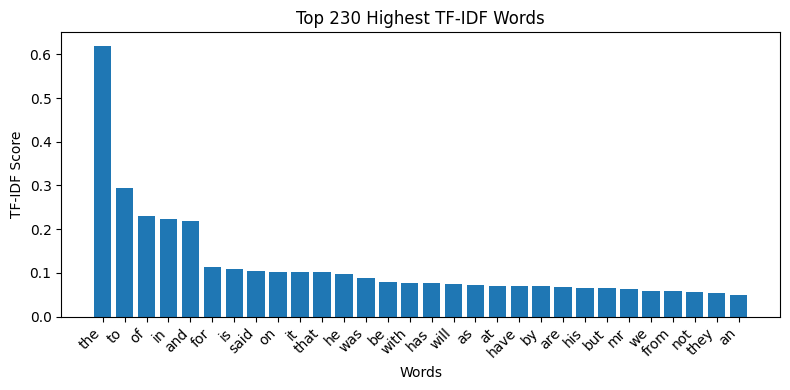

In [ ]:
## Visualize the top 30 most common words in data_train both in normal frequency terms and in TFIDF form

# Word Frequencies
all_words = ' '.join(data_train['Text']).lower().split() # assuming 'text' is your text column
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(30)
words, counts = zip(*most_common_words)
plt.figure(figsize = (8, 4))
plt.bar(words, counts)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title(f"Top {30} Most Common Words")
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()

# TF-IDF
vectorizer = TfidfVectorizer(max_features = 30)
tfidf_matrix = vectorizer.fit_transform(data_train['Text']) # text data transformed here, will be reffered to later
feature_names = vectorizer.get_feature_names_out()
tfidf_scores = np.asarray(tfidf_matrix.mean(axis = 0)).ravel()
tfidf_df = pd.DataFrame({'word': feature_names, 'tfidf': tfidf_scores})
tfidf_df = tfidf_df.sort_values(by = 'tfidf', ascending = False)
plt.figure(figsize = (8, 4))
plt.bar(tfidf_df['word'], tfidf_df['tfidf'])
plt.xlabel("Words")
plt.ylabel("TF-IDF Score")
plt.title("Top 230 Highest TF-IDF Words")
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()

plt.show()

As demonstrated, the top 30 words for standard frequency amongst the entire corpus and relative via tf-idf are similar but not the same.

## Step 2: Building and Training Models

In [ ]:
## For simplicity we will rename train input and labes to x_train and y_train.
# We will also add the test data to the train for the purposes of fitting the classifier
vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(data_train['Text'])
y_train = data_train['Category']
print(f"x_train: {x_train.shape}")
print(f"y_train: {y_train.shape}")

x_train: (1490, 24746)
y_train: (1490,)


In [ ]:
## Use matrix factorization on x_train (in sparse matrix input form)
nmf_model = NMF(n_components = len(set(y_train)))
preds = nmf_model.fit_transform(x_train).argmax(axis=1) # Cluster weights in sets of 5, determine the index (cluster) of the greatest mapping probability for cluster assignment
preds # Examine predictions

array([1, 0, 0, ..., 0, 4, 4])

In [ ]:
def find_best_cluster_mapping(preds, actuals, nmf_model):

    permutation_scores = []
    permutations = itertools.permutations(range(x_train_nmf.shape[1]), n)

    for permutation in permutations:
        mappings_dict = dict(zip(list(set(actuals)), permutation))
        actuals_mapped= actuals.replace(mappings_dict)
        accuracy = accuracy_score(actuals_mapped, preds)
        permutation_scores.append([permutation, accuracy])

    best_score = sorted(permutation_scores, key=lambda x:x[1])[-1]

    return best_score, list(set(actuals))

In [ ]:
# We pass the max values into a function to predict the labels
label_predictions = find_best_cluster_mapping(preds, y_train, len(data_train.Category.unique()))

# Print the results
print(f'The accuracy for the best permutation is approximately: {round(label_predictions[0][1], 4)} for the following permutation:')
best_permutation = pd.DataFrame({"Cluster": label_predictions[0][0], "Category": label_predictions[1]}).set_index("Cluster")
best_permutation

The accuracy for the best permutation is approximately: 0.8765 for the following permutation:


,Category
Cluster,
1,politics
4,tech
2,sport
3,entertainment
0,business


The results using the default model provided a best mapping of:
{'business': 0, 'politics': 1, 'sport': 2, 'entertainment': 3, 'tech': 4},
with a best accuracy of approximately:
0.8765

#### We will now perform the above experiment repeatedly as part of a gridsearch for NMF to find the best hyparameters for this matrix decomposition approach.
To ensure consistent results, the random state will be set to 0.

In [ ]:
## Use matrix factorization on x_train as a gridsearch

init_list = ['nndsvd', 'nndsvda', 'nndsvdar', 'random']
solver_list = ['cd', 'mu']
loss_list = ['frobenius', 'kullback-leibler', 'itakura-saito']
max_iter_list = [100, 200, 500, 1000, 1500, 2000]
l1_ratio_list = [0.0, 0.33, 0.66, 1.0]

In [ ]:
## Perform gridsearch by finding the best combination of the above using the accuracy score provided by the find_best_cluster_mapping method

from sklearn.model_selection import ParameterGrid

param_grid = {
    'n_components': [len(set(y_train))],  # Use the number of unique labels
    'init': init_list,
    'solver': solver_list,
    'beta_loss': loss_list,
    'max_iter': max_iter_list,
    'l1_ratio': l1_ratio_list,
    'random_state': [0]
}

best_params = {}
best_accuracy = 0

for params in ParameterGrid(param_grid):
    nmf_model = NMF(**params)
    try:
      preds = nmf_model.fit_transform(x_train).argmax(axis=1)
    except: # skip invalid combinations for gridsearch
      continue
    label_predictions = find_best_cluster_mapping(preds, y_train, len(data_train.Category.unique()))
    best_map = label_predictions[1]
    accuracy = label_predictions[0][1]

    print(f"Parameters: {params}, Accuracy: {accuracy}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params
        best_mapping = best_map

print(f"\nBest parameters: {best_params}")
print(f"Best accuracy: {best_accuracy}")
print(f"Best mapping: {best_mapping}")

Parameters: {'beta_loss': 'frobenius', 'init': 'nndsvd', 'l1_ratio': 0.0, 'max_iter': 100, 'n_components': 5, 'random_state': 0, 'solver': 'cd'}, Accuracy: 0.876510067114094
Parameters: {'beta_loss': 'frobenius', 'init': 'nndsvd', 'l1_ratio': 0.0, 'max_iter': 100, 'n_components': 5, 'random_state': 0, 'solver': 'mu'}, Accuracy: 0.6791946308724832
Parameters: {'beta_loss': 'frobenius', 'init': 'nndsvd', 'l1_ratio': 0.0, 'max_iter': 200, 'n_components': 5, 'random_state': 0, 'solver': 'cd'}, Accuracy: 0.876510067114094
Parameters: {'beta_loss': 'frobenius', 'init': 'nndsvd', 'l1_ratio': 0.0, 'max_iter': 200, 'n_components': 5, 'random_state': 0, 'solver': 'mu'}, Accuracy: 0.6791946308724832
Parameters: {'beta_loss': 'frobenius', 'init': 'nndsvd', 'l1_ratio': 0.0, 'max_iter': 500, 'n_components': 5, 'random_state': 0, 'solver': 'cd'}, Accuracy: 0.876510067114094
Parameters: {'beta_loss': 'frobenius', 'init': 'nndsvd', 'l1_ratio': 0.0, 'max_iter': 500, 'n_components': 5, 'random_state': 0,

Using Gridsearch, the best NMF model used the parameters: {'beta_loss': 'kullback-leibler', 'init': 'nndsvda', 'l1_ratio': 0.0, 'max_iter': 100, 'n_components': 5, 'random_state': 0, 'solver': 'mu'} with an accuracy of approximately 0.9195 (91.95%).

We will know visualize the performance of this best model using a confusion matrix similar to a supervised learning approach:

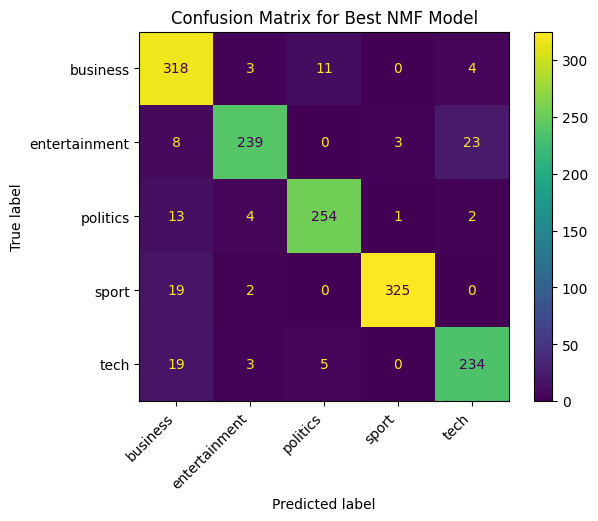

               precision    recall  f1-score   support

     business       0.84      0.95      0.89       336
entertainment       0.95      0.88      0.91       273
     politics       0.94      0.93      0.93       274
        sport       0.99      0.94      0.96       346
         tech       0.89      0.90      0.89       261

     accuracy                           0.92      1490
    macro avg       0.92      0.92      0.92      1490
 weighted avg       0.92      0.92      0.92      1490



In [ ]:
## Display a confusion matrix along with associated classification report demonstrating the best NMF model's performance

best_params = {'beta_loss': 'kullback-leibler', 'init': 'nndsvda', 'l1_ratio': 0.0, 'max_iter': 100, 'n_components': 5, 'random_state': 0, 'solver': 'mu'}
nmf_model = NMF(**best_params)
preds = nmf_model.fit_transform(x_train).argmax(axis=1)
label_predictions = find_best_cluster_mapping(preds, y_train, len(data_train.Category.unique()))
best_permutation = pd.DataFrame({"Cluster": label_predictions[0][0], "Category": label_predictions[1]}).set_index("Cluster")
predicted_labels = pd.Series(preds).replace(dict(zip(best_permutation.index, best_permutation.Category)))

cm = confusion_matrix(y_train, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=np.unique(y_train))
disp.plot()
plt.title("Confusion Matrix for Best NMF Model")
plt.xticks(rotation = 45, ha = 'right')
plt.show()
print(classification_report(y_train, predicted_labels))

### Obtain predictions on the test data
The next step is to get predictions on the test dataset using the previously found best NMF model. Then the results will be submitted to Kaggle to get the score.

In [ ]:
## Using the best nmf_model, obtain predictions on Category on the test data
x_test = vectorizer.transform(data_test['Text'])
test_preds = nmf_model.transform(x_test).argmax(axis=1)
predicted_categories = pd.Series(test_preds).replace(dict(zip(best_permutation.index, best_permutation.Category)))
data_test_predicted = data_test.copy()
data_test_predicted['Category'] = predicted_categories
data_test_predicted = data_test_predicted[['ArticleId', 'Category']]
print(data_test_predicted.head())

   ArticleId  Category
0       1018     sport
1       1319      tech
2       1138     sport
3        459  business
4       1020     sport


In [ ]:
## Generate csv from data_test_predicted. Results obtained through manual upload
output_filepath = "CSCA_5632_week4_data_test_predicted.csv"
data_test_predicted.to_csv(output_filepath, index = False)

#### Kaggle Score:
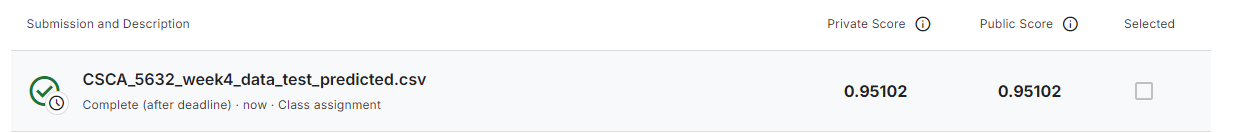

## Step 3: Compare with Supervised Learning

### For this section, a supervised learning model in the form of Logistic Regression will be fit and tested on the data to compare with the Unsupervised NMF model determined in Step 2.
#### 3 Rounds of training will be performed using 1/3, 2/3, 3/3 of the train data will be used to generate results on the test data. Each with a respective Kaggle upload and score. For simplictity, default logistic regression hyparameters will be used.

In [ ]:
vectorizer = TfidfVectorizer()
y_train = data_train['Category']
len_train = len(data_train)

x_train_33 = data_train['Text'][:int(len_train / 3)]
x_train_66 = data_train['Text'][:int(2 * len_train / 3)]
x_train_100 = data_train['Text']

x_train_33 = vectorizer.fit_transform(x_train_33)
y_train_33 = y_train[:int(len(y_train) / 3)]
x_test_33 = vectorizer.transform(data_test['Text'])

x_train_66 = vectorizer.fit_transform(x_train_66)
y_train_66 = y_train[:int(2 * len(y_train) / 3)]
x_test_66 = vectorizer.transform(data_test['Text'])

x_train_100 = vectorizer.fit_transform(x_train_100)
y_train_100 = y_train
x_test_100 = vectorizer.transform(data_test['Text'])

In [ ]:
data_train['Text'][:int(len_train / 3)]

,Text
0,worldcom ex-boss launches defence lawyers defe...
1,german business confidence slides german busin...
2,bbc poll indicates economic gloom citizens in ...
3,lifestyle governs mobile choice faster bett...
4,enron bosses in $168m payout eighteen former e...
...,...
491,what now for kelly holmes last april kelly h...
492,row threatens hendrix museum plan proposals to...
493,web photo storage market hots up an increasing...
494,ask jeeves joins web log market ask jeeves has...


In [ ]:
data_train['Text'][:int(2 * len_train / 3)]

,Text
0,worldcom ex-boss launches defence lawyers defe...
1,german business confidence slides german busin...
2,bbc poll indicates economic gloom citizens in ...
3,lifestyle governs mobile choice faster bett...
4,enron bosses in $168m payout eighteen former e...
...,...
988,howard rebuts asylum criticisms tory leader mi...
989,uk interest rates held at 4.75% the bank of en...
990,portable playstation ready to go sony s playst...
991,us airways staff agree to pay cut a union repr...


In [ ]:
data_train['Text']

,Text
0,worldcom ex-boss launches defence lawyers defe...
1,german business confidence slides german busin...
2,bbc poll indicates economic gloom citizens in ...
3,lifestyle governs mobile choice faster bett...
4,enron bosses in $168m payout eighteen former e...
...,...
1485,double eviction from big brother model caprice...
1486,dj double act revamp chart show dj duo jk and ...
1487,weak dollar hits reuters revenues at media gro...
1488,apple ipod family expands market apple has exp...


#### Fit a logistic regression model on 1/3 of train data:

In [ ]:
model_logistic_33 = LogisticRegression().fit(x_train_33, y_train_33)

In [ ]:
## Make predictions on the test data then create a dataframe with those predictions and ArticleId as columns
y_pred_test = model_logistic_33.predict(x_test_33)
data_test_logistic_predicted = pd.DataFrame({'ArticleId': data_test['ArticleId'], 'Category': y_pred_test})
data_test_logistic_predicted

,ArticleId,Category
0,1018,sport
1,1319,tech
2,1138,sport
3,459,business
4,1020,sport
...,...,...
730,1923,business
731,373,entertainment
732,1704,tech
733,206,business


In [ ]:
## Generate csv from data_test_predicted. Results obtained through manual upload
output_filepath = "CSCA_5632_week4_logistic_33_data_test_predicted.csv"
data_test_logistic_predicted.to_csv(output_filepath, index = False)

Kaggle Score 33%:
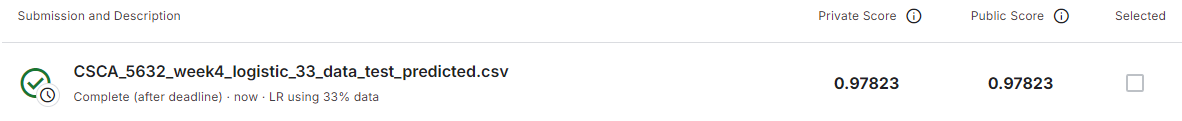

#### Fit a logistic regression model on 2/3 of train data:

In [ ]:
model_logistic_66 = LogisticRegression().fit(x_train_66, y_train_66)

In [ ]:
## Make predictions on the test data then create a dataframe with those predictions and ArticleId as columns
y_pred_test = model_logistic_66.predict(x_test_66)
data_test_logistic_predicted = pd.DataFrame({'ArticleId': data_test['ArticleId'], 'Category': y_pred_test})
data_test_logistic_predicted

,ArticleId,Category
0,1018,sport
1,1319,tech
2,1138,sport
3,459,business
4,1020,sport
...,...,...
730,1923,business
731,373,entertainment
732,1704,business
733,206,business


In [ ]:
## Generate csv from data_test_predicted. Results obtained through manual upload
output_filepath = "CSCA_5632_week4_logistic_66_data_test_predicted.csv"
data_test_logistic_predicted.to_csv(output_filepath, index = False)

Kaggle Score 66%:
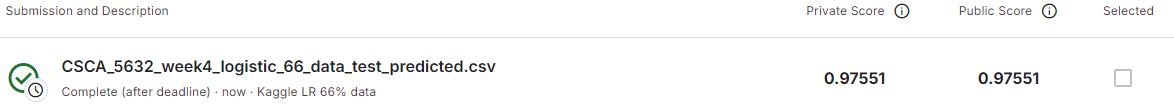

#### Fit a logistic regression model on 3/3 (all) of train data:

In [ ]:
model_logistic_100 = LogisticRegression().fit(x_train_100, y_train_100)

In [ ]:
## Make predictions on the test data then create a dataframe with those predictions and ArticleId as columns
y_pred_test = model_logistic_100.predict(x_test_100)
data_test_logistic_predicted = pd.DataFrame({'ArticleId': data_test['ArticleId'], 'Category': y_pred_test})
data_test_logistic_predicted

,ArticleId,Category
0,1018,sport
1,1319,tech
2,1138,sport
3,459,business
4,1020,sport
...,...,...
730,1923,business
731,373,entertainment
732,1704,business
733,206,business


In [ ]:
## Generate csv from data_test_predicted. Results obtained through manual upload
output_filepath = "CSCA_5632_week4_logistic_100_data_test_predicted.csv"
data_test_logistic_predicted.to_csv(output_filepath, index = False)

Kaggle Score 100%:
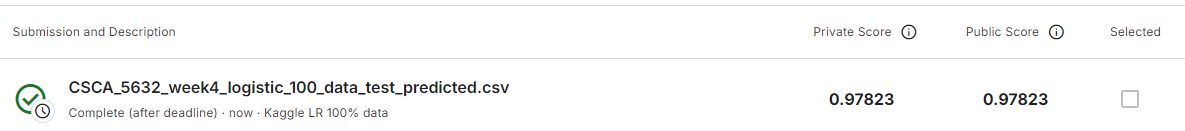

#### Results and Conclusions

*   Each of the Logistic Regression approaches using 33%, 66%, and 100% of total data performed better than the unsupservised NMF approach.
*   Interestingly, the train data subsets varied very little in test performance for the Logistic Regression approach.
*   Logistic Regression is faster to train than NMF and performs well using small subsets of the data as demonstrated by this project.
*   Ways this project could be expanded would be to include other unsupervised learning approaches such K-means clustering or PCA. We could also compare against more supervised models. Both in terms of test data performance, runtime to fit the models, and which perform the best on the smaller subsets of train data.



## References:
Kaggle Competition: https://www.kaggle.com/competitions/learn-ai-bbc/overview

NMF Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html

TF-IDF Wikipedia: https://en.wikipedia.org/wiki/Tf%E2%80%93idf

TF-IDF Image: https://kinder-chen.medium.com/introduction-to-natural-language-processing-tf-idf-1507e907c19